In [1]:
id_to_model = {
    "openai/gpt-oss-120b": "GPT-OSS-120b",
    "gpt-5-mini-2025-08-07": "GPT-5-mini",
    "gemini-2.5-flash": "gemini-2.5-flash",
    "openai/gpt-oss-20b": "GPT-OSS-20b",
    "Qwen/Qwen3-235B-A22B-Instruct-2507-FP8": "Qwen3-235B-A22B-Instruct-2507",
    "gpt-5-nano-2025-08-07": "GPT-5-Nano",
    "Qwen/Qwen3-30B-A3B-Instruct-2507": "Qwen3-30B-A3B-Instruct-2507",
    "mistralai/Mistral-Small-3.2-24B-Instruct-2506": "Mistral-Small-3.2-24B-Instruct-2506",
    "gemini-2.5-flash-lite": "gemini-2.5-flash-lite",
    "gpt-4.1-mini-2025-04-14": "GPT-4.1-mini",
    "google/gemma-3-27b-it": "gemma-3-27b-it",
    "mistralai/Mistral-Large-Instruct-2411": "Mistral-Large-Instruct-2411",
    "google/gemma-3-12b-it": "gemma-3-12b-it",
    "gpt-4.1-nano-2025-04-14": "GPT-4.1-Nano",
    "Qwen/Qwen3-4B-Instruct-2507": "Qwen3-4B-Instruct-2507",
    "RedHatAI/Llama-3.3-70B-Instruct-quantized.w8a8": "Llama-3.3-70B-Instruct",
    "google/gemma-3-4b-it": "gemma-3-4b-it",
    "mistralai/Ministral-8B-Instruct-2410": "Ministral-8B-Instruct-2410",
    "meta-llama/Llama-3.1-8B-Instruct": "Llama-3.1-8B-Instruct",
    "google/gemma-3-1b-it": "gemma-3-1b-it",
    "meta-llama/Llama-3.2-3B-Instruct": "Llama-3.2-3B-Instruct",
    "meta-llama/Llama-3.2-1B-Instruct": "Llama-3.2-1B-Instruct",
    "google/gemma-3-270m-it": "gemma-3-270m-it",
}

model_to_size = {
    "GPT-OSS-120b": 117,
    "GPT-OSS-20b": 21,
    "Qwen3-235B-A22B-Instruct-2507": 235,
    "Qwen3-30B-A3B-Instruct-2507": 30.5,
    "Mistral-Small-3.2-24B-Instruct-2506": 24,
    "gemma-3-27b-it": 27,
    "Mistral-Large-Instruct-2411": 12,
    "gemma-3-12b-it": 12,
    "Qwen3-4B-Instruct-2507": 4,
    "Llama-3.3-70B-Instruct-quantized.w8a8": 70,
    "gemma-3-4b-it": 4,
    "Ministral-8B-Instruct-2410": 8,
    "Llama-3.1-8B-Instruct": 8,
    "gemma-3-1b-it": 1,
    "Llama-3.2-3B-Instruct": 3,
    "Llama-3.2-1B-Instruct": 1,
    "gemma-3-270m-it": 0.27,
}

In [2]:
# Plot style
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("white")
plt.rcParams["text.usetex"] = True
plt.rcParams["font.family"] =  "Latin Modern"
plt.rcParams["font.size"] = 20
plt.rcParams["xtick.direction"] = "in" 
plt.rcParams["ytick.direction"] = "in" 
plt.rcParams["xtick.top"] = True
plt.rcParams["xtick.bottom"] = True 
plt.rcParams["ytick.right"] = True 
plt.rcParams["ytick.left"] = True
plt.rcParams["xtick.major.size"] = 3
plt.rcParams["ytick.major.size"] = 3

In [3]:
import pandas as pd

# Load Results Tables
mmlu_lexical_results_df = pd.read_csv("../../data/result_tables/mmlu_lexical.csv")
squad_lexical_results_df = pd.read_csv("../../data/result_tables/squad_lexical.csv")
amega_lexical_results_df = pd.read_csv("../../data/result_tables/amega_lexical.csv")

# Filter dfs to only include open-weight models
dfs = {
    "(a) MMLU": mmlu_lexical_results_df[mmlu_lexical_results_df["model"].isin(model_to_size.keys())],
    "(b) SQuAD": squad_lexical_results_df[squad_lexical_results_df["model"].isin(model_to_size.keys())],
    "(c) AMEGA": amega_lexical_results_df[amega_lexical_results_df["model"].isin(model_to_size.keys())],
}
# Add size column to dfs
for df in dfs.values():
    df["size"] = df["model"].map(model_to_size)


/var/folders/dn/rkkxq6wj6tzgm8gxb2zx45hr0000gn/T/ipykernel_76924/199085193.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["size"] = df["model"].map(model_to_size)
/var/folders/dn/rkkxq6wj6tzgm8gxb2zx45hr0000gn/T/ipykernel_76924/199085193.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["size"] = df["model"].map(model_to_size)
/var/folders/dn/rkkxq6wj6tzgm8gxb2zx45hr0000gn/T/ipykernel_76924/199085193.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataF

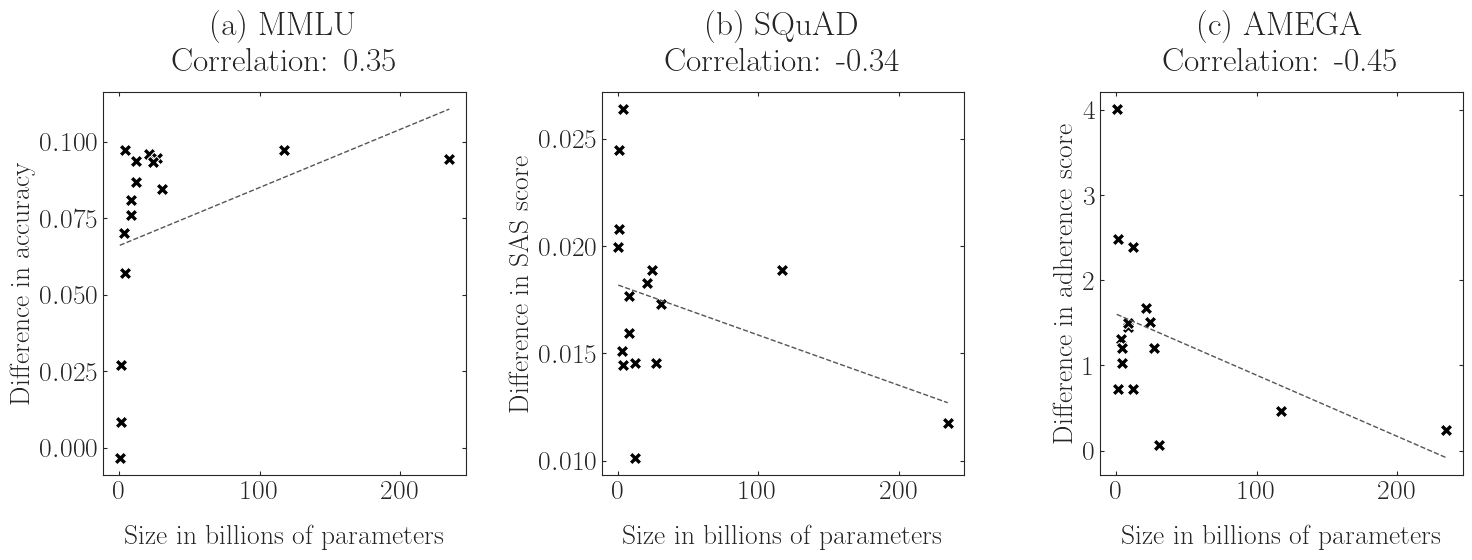

In [4]:
from scipy.stats import linregress

fig, axes = plt.subplots(1, 3, figsize=(15, 6))
for i, (label, df) in enumerate(dfs.items()):
    x_col = "size"
    y_col = "score_difference"
    if label == "(b) SQuAD":
        y_col = "difference_sas"

    sns.scatterplot(
        data=df,
        x=x_col,
        y=y_col,
        s=80,
        marker="X",
        color="black",
        ax=axes[i],
        legend=False,
    )
    # correlation
    corr = df[x_col].corr(df[y_col])
    axes[i].set_title(label + f"\nCorrelation: {corr:.2f}", pad=15  )
    sns.regplot(
        data=df,
        x=x_col,
        y=y_col,
        ci=None,
        scatter=False,
        line_kws={"color": "#555555", "linewidth": 1, "linestyle": "--"},
        ax=axes[i],
    )
    if label == "(a) MMLU":
        y_label = "Difference in accuracy"
    elif label == "(b) SQuAD":
        y_label = "Difference in SAS score"
    elif label == "(c) AMEGA":
        y_label = "Difference in adherence score"
    axes[i].set_ylabel(y_label)
    axes[i].set_xlabel("Size in billions of parameters", labelpad=15)

plt.tight_layout()
plt.show()


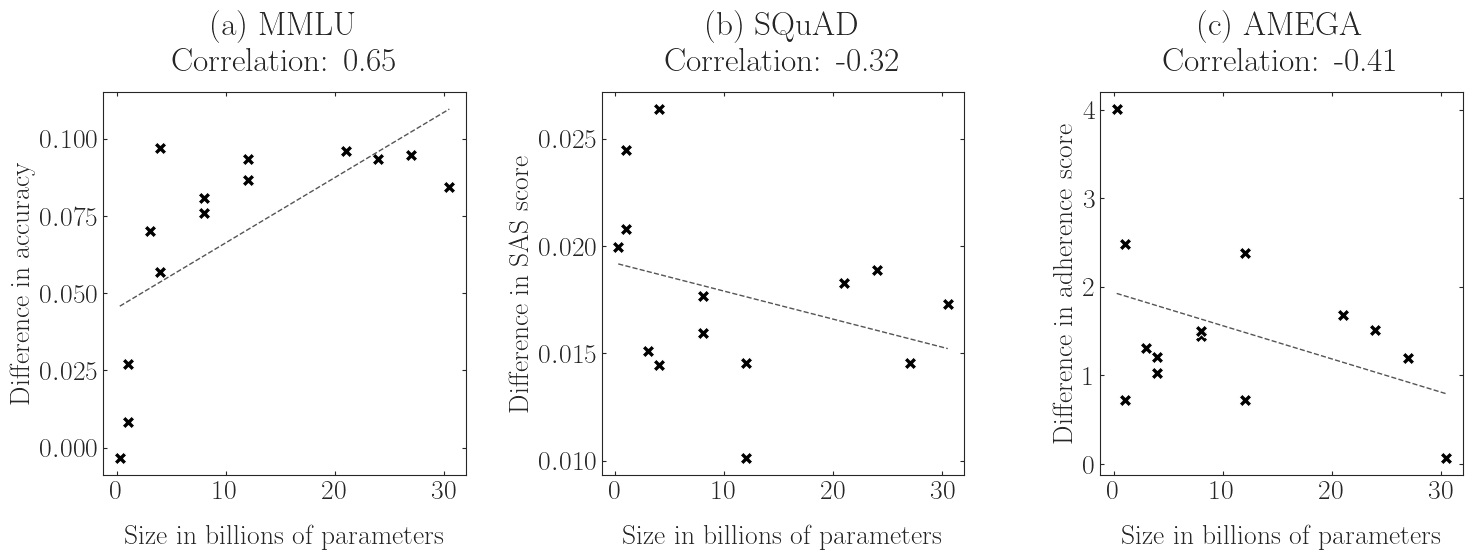

In [5]:

fig, axes = plt.subplots(1, 3, figsize=(15, 6))
for i, (label, df) in enumerate(dfs.items()):
    x_col = "size"
    y_col = "score_difference"
    if label == "(b) SQuAD":
        y_col = "difference_sas"

    df = df[df["size"] < 100]
    sns.scatterplot(
        data=df,
        x=x_col,
        y=y_col,
        s=80,
        marker="X",
        color="black",
        ax=axes[i],
        legend=False,
    )
    # correlation
    corr = df[x_col].corr(df[y_col])
    axes[i].set_title(label + f"\nCorrelation: {corr:.2f}", pad=15)
    sns.regplot(
        data=df,
        x=x_col,
        y=y_col,
        ci=None,
        scatter=False,
        line_kws={"color": "#555555", "linewidth": 1, "linestyle": "--"},
        ax=axes[i],
    )
    if label == "(a) MMLU":
        y_label = "Difference in accuracy"
    elif label == "(b) SQuAD":
        y_label = "Difference in SAS score"
    elif label == "(c) AMEGA":
        y_label = "Difference in adherence score"
    axes[i].set_ylabel(y_label)
    axes[i].set_xlabel("Size in billions of parameters", labelpad=15)
    
plt.tight_layout()
plt.savefig("../../figs/correlation_analysis_size_lexical.pdf", dpi=300)
plt.show()


In [6]:
import pandas as pd

# Load Results Tables
mmlu_syntactic_results_df = pd.read_csv("../../data/result_tables/mmlu_syntactic.csv")
squad_syntactic_results_df = pd.read_csv("../../data/result_tables/squad_syntactic.csv")
amega_syntactic_results_df = pd.read_csv("../../data/result_tables/amega_syntactic.csv")

# Filter dfs to only include open-weight models
dfs = {
    "(a) MMLU": mmlu_syntactic_results_df[mmlu_syntactic_results_df["model"].isin(model_to_size.keys())],
    "(b) SQuAD": squad_syntactic_results_df[squad_syntactic_results_df["model"].isin(model_to_size.keys())],
    "(c) AMEGA": amega_syntactic_results_df[amega_syntactic_results_df["model"].isin(model_to_size.keys())],
}
# Add size column to dfs
for df in dfs.values():
    df["size"] = df["model"].map(model_to_size)


/var/folders/dn/rkkxq6wj6tzgm8gxb2zx45hr0000gn/T/ipykernel_76924/1544090215.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["size"] = df["model"].map(model_to_size)
/var/folders/dn/rkkxq6wj6tzgm8gxb2zx45hr0000gn/T/ipykernel_76924/1544090215.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["size"] = df["model"].map(model_to_size)
/var/folders/dn/rkkxq6wj6tzgm8gxb2zx45hr0000gn/T/ipykernel_76924/1544090215.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a Da

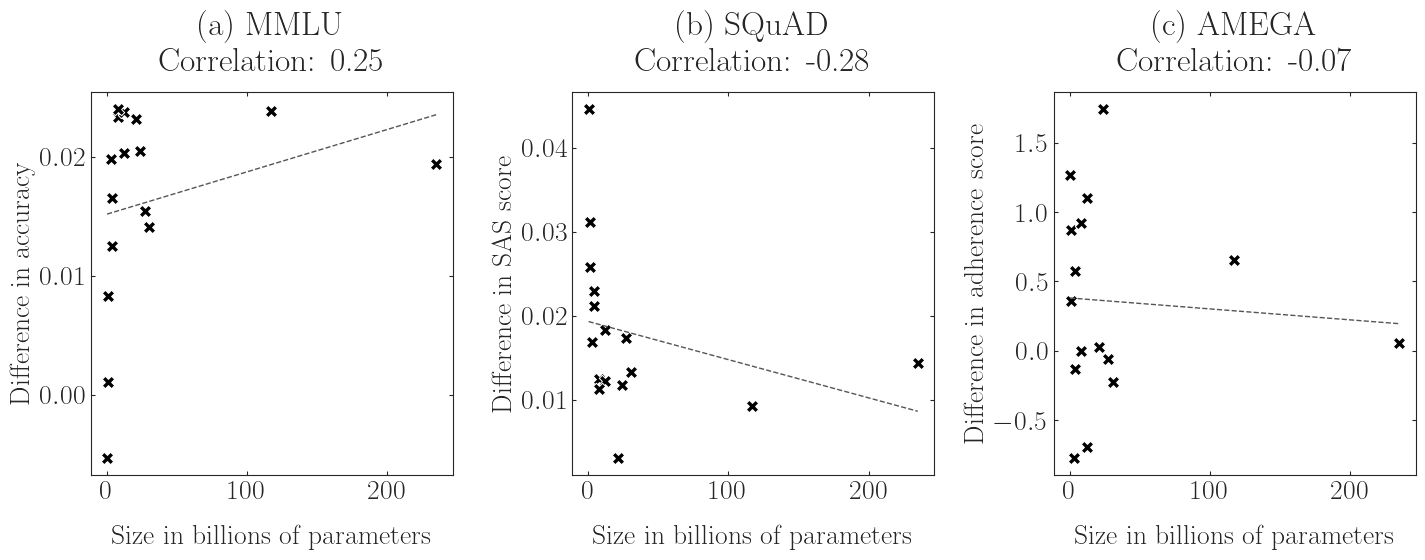

In [7]:
from scipy.stats import linregress

fig, axes = plt.subplots(1, 3, figsize=(15, 6))
for i, (label, df) in enumerate(dfs.items()):
    x_col = "size"
    y_col = "score_difference"
    if label == "(b) SQuAD":
        y_col = "difference_sas"

    sns.scatterplot(
        data=df,
        x=x_col,
        y=y_col,
        s=80,
        marker="X",
        color="black",
        ax=axes[i],
        legend=False,
    )
    # correlation
    corr = df[x_col].corr(df[y_col])
    axes[i].set_title(label + f"\nCorrelation: {corr:.2f}", pad=15)
    sns.regplot(
        data=df,
        x=x_col,
        y=y_col,
        ci=None,
        scatter=False,
        line_kws={"color": "#555555", "linewidth": 1, "linestyle": "--"},
        ax=axes[i],
    )
    if label == "(a) MMLU":
        y_label = "Difference in accuracy"
    elif label == "(b) SQuAD":
        y_label = "Difference in SAS score"
    elif label == "(c) AMEGA":
        y_label = "Difference in adherence score"
    axes[i].set_ylabel(y_label)
    axes[i].set_xlabel("Size in billions of parameters", labelpad=15)

plt.tight_layout()
plt.show()


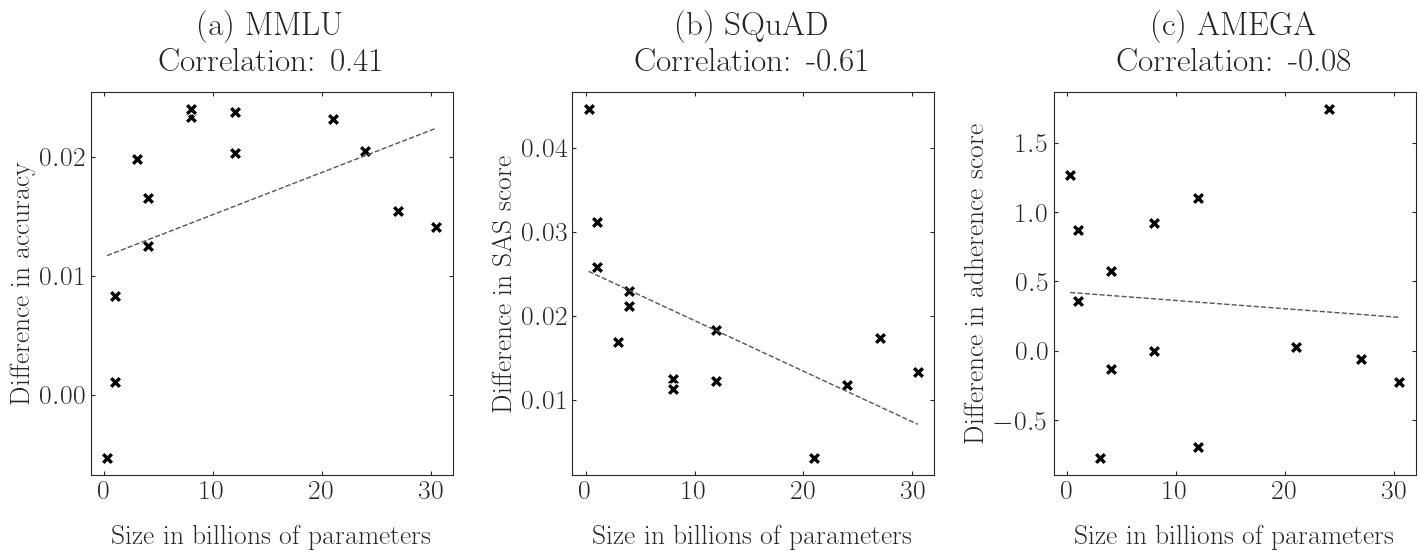

In [8]:
from scipy.stats import linregress

fig, axes = plt.subplots(1, 3, figsize=(15, 6))
for i, (label, df) in enumerate(dfs.items()):
    x_col = "size"
    y_col = "score_difference"
    if label == "(b) SQuAD":
        y_col = "difference_sas"

    df = df[df["size"] < 100]
    sns.scatterplot(
        data=df,
        x=x_col,
        y=y_col,
        s=80,
        marker="X",
        color="black",
        ax=axes[i],
        legend=False,
    )
    # correlation
    corr = df[x_col].corr(df[y_col])
    axes[i].set_title(label + f"\nCorrelation: {corr:.2f}", pad=15)
    sns.regplot(
        data=df,
        x=x_col,
        y=y_col,
        ci=None,
        scatter=False,
        line_kws={"color": "#555555", "linewidth": 1, "linestyle": "--"},
        ax=axes[i],
    )
    axes[i].set_xlabel("Size in billions of parameters", labelpad=15)
    if label == "(a) MMLU":
        y_label = "Difference in accuracy"
    elif label == "(b) SQuAD":
        y_label = "Difference in SAS score"
    elif label == "(c) AMEGA":
        y_label = "Difference in adherence score"
    axes[i].set_ylabel(y_label)

plt.tight_layout()
plt.savefig("../../figs/correlation_analysis_size_syntactic.pdf", dpi=300)
plt.show()
